<a href="https://colab.research.google.com/github/accollier/python/blob/main/SmallCaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests-cache
!pip install yfinance --upgrade --no-cache-dir
!pip install requests-ratelimiter


In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yfinance as yf
import requests
import requests_cache

In [ ]:
from requests import Session
from requests_cache import CacheMixin, SQLiteCache
from requests_ratelimiter import LimiterMixin, MemoryQueueBucket
from pyrate_limiter import Duration, RequestRate, Limiter


In [ ]:
class CachedLimiterSession(CacheMixin, LimiterMixin, Session):pass
session = CachedLimiterSession(limiter=Limiter(RequestRate(2, Duration.SECOND*5)),  # max 2 requests per 5 seconds
bucket_class=MemoryQueueBucket,backend=SQLiteCache("yfinance.cache"),)

In [ ]:
virgin = yf.Ticker("SPCE")

#stock info
virgin.info

# historical market data
hist = virgin.history(period="max")

# show news
virgin.news

In [ ]:
# # show meta information about the history
# virgin.history_metadata

# # show financials:
# # - income statement
# virgin.income_stmt
# virgin.quarterly_income_stmt
# # - balance sheet
# virgin.balance_sheet
# virgin.quarterly_balance_sheet
# # - cash flow statement
# virgin.cashflow
# virgin.quarterly_cashflow
# # see `Ticker.get_income_stmt()` for more options

# # show analysts recommendations
# # virgin.recommendations
# # virgin.recommendations_summary

In [ ]:
carros = {'abc', 'Cdab'}
print(carros)

{'abc', 'Cdab'}


In [ ]:
data = yf.download("SPCE", start="2018-1-1")["Adj Close"]
data.plot(figsize = (15, 6))
plt.show

[*********************100%***********************]  4 of 4 completed


<function matplotlib.pyplot.show(close=None, block=None)>

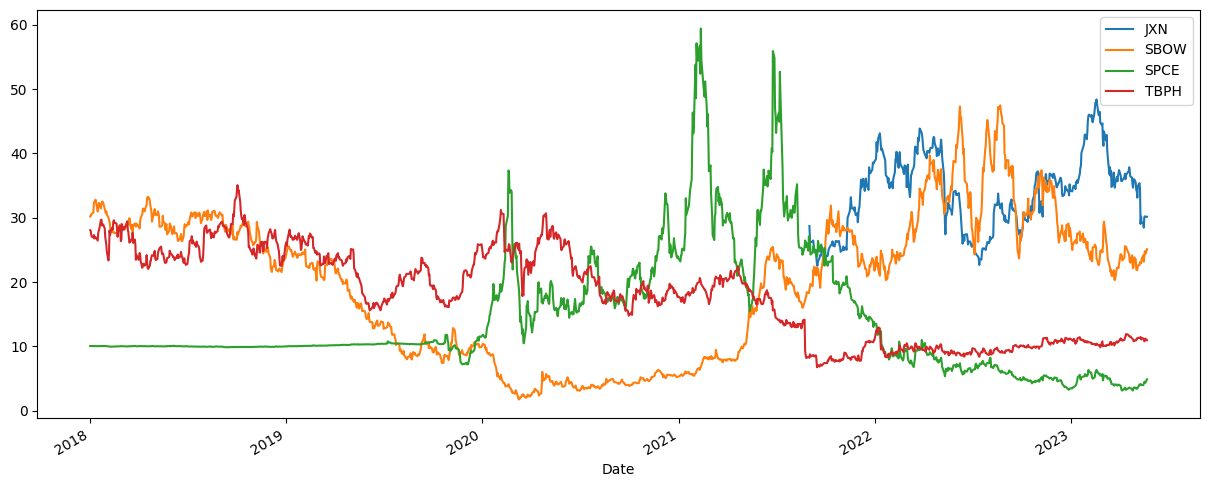

In [ ]:
data = yf.download("SPCE JXN SBOW TBPH", start="2018-1-1")["Adj Close"]
data.plot(figsize = (15, 6))
plt.show